In [1]:
import numpy as np
import pyomo.environ as pyo
from jobshop.params import JobShopRandomParams
from jobshop.mip.disjunctive import DisjModel
from jobshop.heurstic.grasp.simple import grasp
from jobshop.heurstic.grasp.pr import grasp_pr, grasp_pr_alt

Path-relinking is being included. Please take a look at [this section](#under-development-path-relinking)

In [2]:
params = JobShopRandomParams(10, 10, t_span=(0, 20), seed=12)

Para a instancia 8x10 (0, 20) seed=12 124 é ótimo
Para a instancia 10x12 (0, 20) seed=12 166 é ótimo
Para a instancia 15x15 (0, 20) seed=12 226 parece ótimo

In [9]:
model = DisjModel(params)
solver = pyo.SolverFactory("cbc")
solver.options["cuts"] = "on"
solver.options["sec"] = 10

In [10]:
solver.solve(model, tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Users\Bruno\Documents\Programas\Cbc\bin\cbc.exe -cuts on -sec 10 -printingOptions all -import C:\Users\Bruno\AppData\Local\Temp\tmpayko8nwp.pyomo.lp -stat=1 -solve -solu C:\Users\Bruno\AppData\Local\Temp\tmpayko8nwp.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 10
Option for printingOptions changed from normal to all
Presolve 512 (-513) rows, 289 (-289) columns and 1472 (-961) elements
Statistics for presolved model
Original problem has 512 integers (512 of which binary)
Presolved problem has 224 integers (224 of which binary)
==== 288 zero objective 2 different
288 variables have objective of 0
1 variables have objective of 1
==== absolute objective values 2 different
288 variables have objective of 0
1 variables have objective of 1
==== for integers 224 zero objective 1 different
224 variables have objective of 0
==== for integers absolute objective values 1 different
224

{'Problem': [{'Name': 'unknown', 'Lower bound': 113.0, 'Upper bound': 144.0, 'Number of objectives': 1, 'Number of constraints': 512, 'Number of variables': 289, 'Number of binary variables': 512, 'Number of integer variables': 512, 'Number of nonzeros': 1, 'Sense': 'minimize'}], 'Solver': [{'Status': 'aborted', 'User time': -1.0, 'System time': 10.22, 'Wallclock time': 10.22, 'Termination condition': 'maxTimeLimit', 'Termination message': 'Optimization terminated because the time expended exceeded the value specified in the seconds parameter.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 2, 'Number of created subproblems': 2}, 'Black box': {'Number of iterations': 3141}}, 'Error rc': 0, 'Time': 10.5070219039917}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

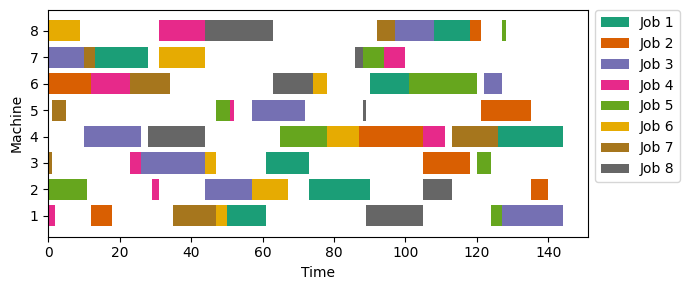

In [11]:
model.plot()

In [12]:
print(model.obj())

144.0


In [3]:
sol_grasp = grasp(params, n_iter=10000, alpha=(0.3, 0.9), seed=12, verbose=True)

New best solution 206
New best solution 188
New best solution 179
New best solution 172
New best solution 170
New best solution 164
New best solution 158


In [4]:
sol_grasp.C

158

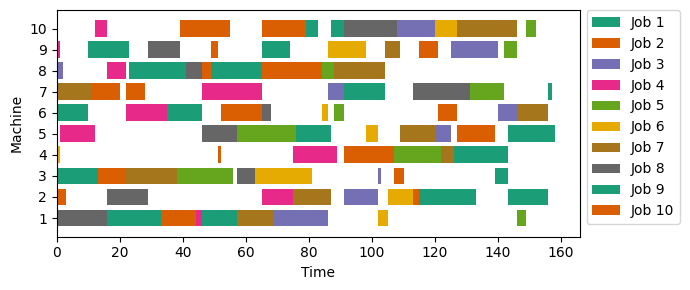

In [5]:
sol_grasp.plot()

In [6]:
sol_grasp_pr = grasp_pr(params, n_iter=10000, init_iter=0.5, alpha=(0.3, 0.9), maxpool=20, seed=12, verbose=True)

First solution: 206
New best solution: 188
Updated Pool: [188. 206.]
New quality solution: 205
Updated Pool: [188. 205. 206.]
New quality solution: 199
Updated Pool: [188. 199. 205. 206.]
New quality solution: 196
Updated Pool: [188. 196. 199. 205. 206.]
New best solution: 179
Updated Pool: [179. 188. 196. 199. 205. 206.]
New best solution: 172
Updated Pool: [172. 179. 188. 196. 199. 205. 206. 207.]
New quality solution: 180
Updated Pool: [172. 179. 180. 188. 196. 199. 205. 206. 207.]
New quality solution: 186
Updated Pool: [172. 179. 180. 186. 188. 196. 199. 205. 206. 207.]
New quality solution: 189
Updated Pool: [172. 179. 180. 186. 188. 189. 196. 199. 205. 206. 207.]
New quality solution: 207
Updated Pool: [172. 179. 180. 186. 188. 189. 196. 199. 205. 206. 207. 207.]
New quality solution: 195
Updated Pool: [172. 179. 180. 186. 188. 189. 195. 196. 199. 205. 206. 207. 207. 212.]
New quality solution: 200
Updated Pool: [172. 179. 180. 186. 188. 189. 195. 196. 199. 200. 205. 206. 207. 2

In [58]:
sol_grasp_pr[0].C

161

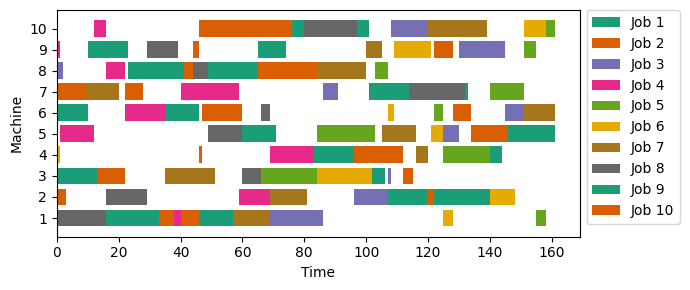

In [59]:
sol_grasp_pr[0].plot()